# Exploratory Data Analysis

In this notebook we examine and visualize our data in order to gain insights and understand its characteristics and patterns. This will help us generate hypotheses about the data, identify outliers, explore trnds and patterns in the data and also help us identify potential realtionships between the variables.

Loading the required Libraries for the EDA:

In [346]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

# Define the Seaborn theme
sns.set_style("whitegrid")
sns.set_palette("Set2")
sns.set_context("notebook", font_scale=1.2)

Loading the data:

In [251]:
youtube_data = pd.read_csv('..\Data\youtube_videos.csv', parse_dates=['publishedAt', 'trending_date'])

youtube_data.head(5)

,title,publishedAt,channelTitle,categoryName,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description
0,Diljit Dosanjh: CLASH (Official) Music Video |...,2020-08-11 07:30:02+00:00,Diljit Dosanjh,Music,2020-08-12 00:00:00+00:00,clash diljit dosanjh|diljit dosanjh|diljit dos...,9140911,296541,6180,30059,0,0,CLASH official music video performed by DILJIT...
1,I left youtube for a month and THIS is what ha...,2020-08-11 16:34:06+00:00,jacksepticeye,Entertainment,2020-08-12 00:00:00+00:00,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353797,2628,40222,0,0,I left youtube for a month and this is what ha...
2,Apex Legends | Stories from the Outlands – “Th...,2020-08-11 17:00:10+00:00,Apex Legends,Gaming,2020-08-12 00:00:00+00:00,Apex Legends|Apex Legends characters|new Apex ...,2381688,146740,2794,16549,0,0,"While running her own modding shop, Ramya Pare..."
3,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11 19:20:14+00:00,Brawadis,People & Blogs,2020-08-12 00:00:00+00:00,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156914,5857,35331,0,0,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
4,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11 15:10:05+00:00,Mr. Kate,Howto & Style,2020-08-12 00:00:00+00:00,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45803,964,2198,0,0,Transforming The LaBrant Family's empty white ...


### Checking Data Quality:

We will start by checking if there are any missing values in the dataset.

In [252]:
youtube_data.isnull().sum()

title                   0
publishedAt             0
channelTitle            0
categoryName            0
trending_date           0
tags                    0
view_count              0
likes                   0
dislikes                0
comment_count           0
comments_disabled       0
ratings_disabled        0
description          4105
dtype: int64

There are 4105 missing video descriptions. We will replace the null values with "no description provided"

In [253]:
youtube_data['description'].fillna("no description provided", inplace=True)

In [254]:
youtube_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199237 entries, 0 to 199236
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   title              199237 non-null  object             
 1   publishedAt        199237 non-null  datetime64[ns, UTC]
 2   channelTitle       199237 non-null  object             
 3   categoryName       199237 non-null  object             
 4   trending_date      199237 non-null  datetime64[ns, UTC]
 5   tags               199237 non-null  object             
 6   view_count         199237 non-null  int64              
 7   likes              199237 non-null  int64              
 8   dislikes           199237 non-null  int64              
 9   comment_count      199237 non-null  int64              
 10  comments_disabled  199237 non-null  int64              
 11  ratings_disabled   199237 non-null  int64              
 12  description        199237 non-

Overall, we have `13 columns` and `199237 rows`. Over the next few sections, we will explore these features and try to uncover trends, patterns and relationships in this dataset.

### Dropping the `dislikes` feature

In November 2021, YouTube removed the public dislike count from all its videos. So any video from November 2021 onwards has 0 for the dislike column. So, since it doesnot provide any information, we will remove it from our data.

In [255]:
youtube_data.drop(columns=['dislikes'], inplace=True)

#### Are there any duplicate rows?

In [256]:
youtube_data[youtube_data.duplicated()]

,title,publishedAt,channelTitle,categoryName,trending_date,tags,view_count,likes,comment_count,comments_disabled,ratings_disabled,description
7891,Charli & Dixie D'Amelio Reveal Their Favorite ...,2020-09-16 21:00:11+00:00,Seventeen,Howto & Style,2020-09-20 00:00:00+00:00,charli d'amelio|charli d'amelio tiktok|charli|...,982740,49817,1926,0,0,Charli and Dixie D'Amelio are be the most famo...
7892,Marvel’s Spider-Man: Miles Morales PS5 Gamepla...,2020-09-16 23:05:58+00:00,Marvel Entertainment,Entertainment,2020-09-20 00:00:00+00:00,marvel|Spider-Man|spider|man|miles|morales|mil...,582189,33955,3587,0,0,Experience the rise of Miles Morales in this g...
7893,BigKayBeezy Feat. Polo G Bookbag 2.0 (Official...,2020-09-16 18:00:09+00:00,Bigkaybeezy,Music,2020-09-20 00:00:00+00:00,BigKayBeezy|Bookbag|Bookbag 2.0|Bookbag 2|Book...,919247,71884,3983,0,0,BAD INTENTIONS out now on all platforms: https...
7894,Keith Eats Everything At Sonic,2020-09-16 15:00:03+00:00,The Try Guys,Comedy,2020-09-20 00:00:00+00:00,try guys|keith|ned|zach|eugene|habersberger|fu...,1765024,69002,6198,0,0,Wow we could all use a Sonic shake rn... Watch...
7895,How Kodak Detected the Atomic Bomb,2020-09-16 18:17:48+00:00,Veritasium,Education,2020-09-20 00:00:00+00:00,veritasium|science|physics|nuclear bomb|atomic...,967502,75769,4720,0,0,Kodak detected the first atomic bomb before an...
...,...,...,...,...,...,...,...,...,...,...,...,...
38505,Trying Tactical Products,2021-02-16 21:05:34+00:00,2 Danny 2 Furious,People & Blogs,2021-02-24 00:00:00+00:00,danny gonzalez|dannygonzalez|funny|skit|vine c...,1239442,113691,8952,0,0,this video is about trying tac products is wha...
38509,HIGHLIGHTS | FC Porto vs. Juventus: First Leg ...,2021-02-17 22:56:34+00:00,DAZN Canada,Sports,2021-02-24 00:00:00+00:00,dazn|football|highlights|recap|replay|all goal...,104832,1059,435,0,0,"February 17th, 2021 -- FC Porto vs. Juventus: ..."
38511,Historic winter storm leaves millions of Texas...,2021-02-16 12:58:52+00:00,CBS This Morning,News & Politics,2021-02-24 00:00:00+00:00,winter storm|texas|residents|without power|wat...,331499,1878,1346,0,0,Millions of people are desperate for power in ...
38512,POV you just turned on the History Channel for...,2021-02-16 17:26:47+00:00,Joel Haver,Film & Animation,2021-02-24 00:00:00+00:00,Joel Haver|Trent Lenkarski|History|History Cha...,1447015,177067,7348,0,0,Do not try what you're about to see at home.Su...


We have 109 duplicate entries in our data. So, we will remove these duplicates.

In [257]:
youtube_data.drop_duplicates(inplace=True)

In [258]:
youtube_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199128 entries, 0 to 199236
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   title              199128 non-null  object             
 1   publishedAt        199128 non-null  datetime64[ns, UTC]
 2   channelTitle       199128 non-null  object             
 3   categoryName       199128 non-null  object             
 4   trending_date      199128 non-null  datetime64[ns, UTC]
 5   tags               199128 non-null  object             
 6   view_count         199128 non-null  int64              
 7   likes              199128 non-null  int64              
 8   comment_count      199128 non-null  int64              
 9   comments_disabled  199128 non-null  int64              
 10  ratings_disabled   199128 non-null  int64              
 11  description        199128 non-null  object             
dtypes: datetime64[ns, UTC](2), int64(5)

We can see that after dropping all the duplicated entries, we are left with 199128 rows.

Some videos are trending for more than one day in a row. So such videos will effect our analysis if we treat them separately. Instead, we will only keep the latest version for each video that had been trending for multiple days.

In [259]:
youtube_sorted = youtube_data.copy()

youtube_sorted.sort_values(['title', 'trending_date'], inplace=True)

youtube_sorted['trending_next_day'] = youtube_sorted.groupby('title')['trending_date'].shift(-1)
# No. of days video has been trending for (excluding current date)
youtube_sorted['trending_for'] = (youtube_sorted['trending_next_day'] - youtube_sorted['trending_date']).dt.days.cumsum().fillna(1)
# is the video same as the next row and next trending day is after trending_date
consecutive_rows = (youtube_sorted['title'] == youtube_sorted['title'].shift(-1)) & \
       (youtube_sorted['trending_next_day'] == youtube_sorted['trending_date'] + pd.Timedelta(days=1))

youtube_sorted.loc[consecutive_rows, 'trending_for'] = youtube_sorted.loc[consecutive_rows, 'trending_for'].diff().fillna(1)

# tracking the last row for each title
last_row = youtube_sorted['title'] != youtube_sorted['title'].shift(-1)

# filtering to only keep last row for each title
youtube_sorted = youtube_sorted[last_row]

youtube_sorted.drop(columns=['trending_next_day', 'trending_for'], axis=1, inplace=True)

#### Exploring `publishedAt` and `trending_date`

- `publishedAt` is the date on which the video was released
- `trending_date` is the date on which the video was trending

Checking the range of `publishedAt`:

In [260]:
earliest = youtube_data['publishedAt'].min()
latest = youtube_data['publishedAt'].max()

print('Earliest video was on', earliest)
print('Latest video on', latest)

Earliest video was on 2020-07-27 21:49:32+00:00
Latest video on 2023-04-30 16:48:52+00:00


Checking the range of `trending_date`:

In [261]:
earliest_trending = youtube_data['trending_date'].min()
latest_trending = youtube_data['trending_date'].max()

print('Earliest video was trending', earliest)
print('Latest video trending', latest)

Earliest video was trending 2020-07-27 21:49:32+00:00
Latest video trending 2023-04-30 16:48:52+00:00


This implies that videos here may not start trending right away but instead might take some time longer as the earliest publish date is 27th July 2020 but the earliest trending date is 12th August 2020.

So, the videos here are the trending videos from August 12th 2020 to May 1st 2023. The oldest video in this dataset is from July 27th 2020.

Next we would like to check the time difference between videos being published and videos trending. But before that we need to remove the time portion from the `publishedAt` column since time portion in trending is not correct, so we can only compare by days.

In [262]:
youtube_sorted['trending_date'] = pd.to_datetime(youtube_sorted['trending_date'].dt.date)

youtube_sorted['publish_time'] = pd.to_datetime(youtube_sorted['publishedAt'].dt.time, format='%H:%M:%S')
youtube_sorted['publishedAt'] = pd.to_datetime(youtube_sorted['publishedAt'].dt.date)

In [263]:
youtube_sorted['time_diff'] = youtube_sorted['trending_date'] - youtube_sorted['publishedAt']

youtube_sorted['time_diff'].describe()

count                        40130
mean     5 days 16:21:28.930974333
std      2 days 04:17:43.205791298
min                0 days 00:00:00
25%                5 days 00:00:00
50%                6 days 00:00:00
75%                6 days 00:00:00
max               34 days 00:00:00
Name: time_diff, dtype: object

- On average, it takes a video around 5 days 16 hours from the time it was published to start trending.
- Some videos can start trending on the same day it was posted
- the maximum time it took for a video to start trending was 34 days from the time it was posted.

for the `publish_time` column created earlier, we will group it into 'morning', 'evening' and 'night':

In [264]:
youtube_sorted['publish_time'] = youtube_sorted['publish_time'].dt.hour

bins = [0, 12, 18, 24]
day_type = ['morning', 'evening', 'night']

youtube_sorted['day_publish'] = pd.cut(youtube_sorted['publish_time'], bins=bins, labels=day_type)

youtube_sorted.drop(columns=['publish_time'], axis=1, inplace=True)

youtube_sorted.head()

,title,publishedAt,channelTitle,categoryName,trending_date,tags,view_count,likes,comment_count,comments_disabled,ratings_disabled,description,time_diff,day_publish
28910,!@#$%$#!! || Dubov vs Carlsen || Airthings Mas...,2020-12-30,agadmator's Chess Channel,Entertainment,2021-01-07,agadmator|chess|best chess channel|best youtub...,595687,24882,2166,0,0,Follow me on Instagram for extra content https...,8 days,evening
64059,#1 76ERS at #5 HAWKS | FULL GAME HIGHLIGHTS | ...,2021-06-17,NBA,Sports,2021-06-21,Basketball|G League|NBA|game-0042000205,1605052,16700,5527,0,0,#1 76ERS at #5 HAWKS | FULL GAME HIGHLIGHTS | ...,4 days,morning
198301,#1 BUCKS at #8 HEAT | FULL GAME 4 HIGHLIGHTS |...,2023-04-25,NBA,Sports,2023-04-27,Basketball|G League|NBA|game-0042200104,2271870,23321,3602,0,0,"Never miss a moment with the latest news, tren...",2 days,morning
131431,#1 HEAT at #2 CELTICS | FULL GAME HIGHLIGHTS |...,2022-05-22,NBA,Sports,2022-05-27,Basketball|G League|NBA|game-0042100303,2567996,25741,3532,0,0,"Stay up-to-date on news, live scores and stats...",5 days,morning
132632,#1 HEAT at #2 CELTICS | FULL GAME HIGHLIGHTS |...,2022-05-28,NBA,Sports,2022-06-02,Basketball|G League|NBA|game-0042100306,2962882,32034,4019,0,0,"Stay up-to-date on news, live scores and stats...",5 days,morning


Checking the breakdown of videos published by time of day:

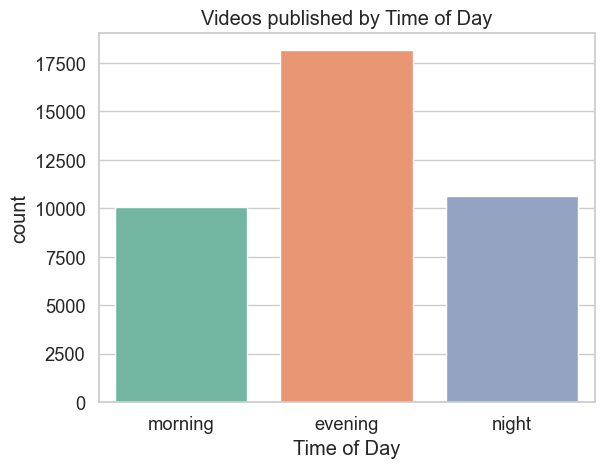

In [265]:
sns.countplot(x = 'day_publish', data=youtube_sorted)
plt.title("Videos published by Time of Day")
plt.xlabel("Time of Day")
plt.show()

More videos were published during the evening than in the morning or night time.

#### Checking the most popular videos by category

Each video belongs to a category. We can check which of these categories have the most trending videos and also check the most popular ones for each category.

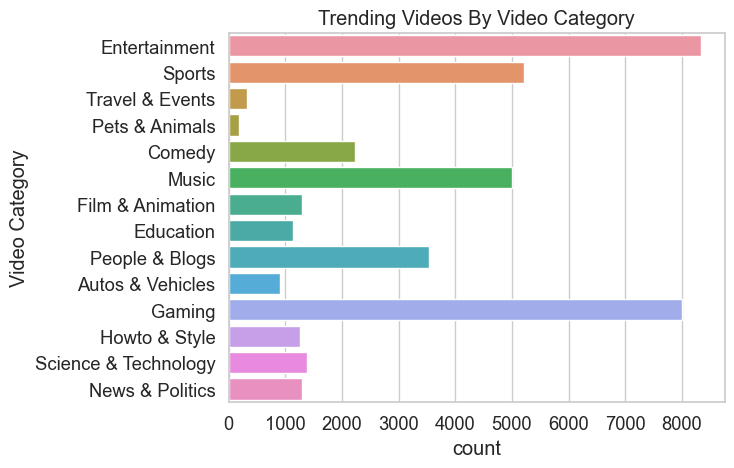

In [266]:
sns.countplot(y = 'categoryName', data=youtube_sorted)
plt.title("Trending Videos By Video Category")
plt.ylabel("Video Category")
plt.show()

There are a total of 14 video categories. The top 5 video categories with the most trending videos are: Entertainment, Gaming, Sports, Music and People & Blogs respectively.

Now that we know the most popular vide categories, we can also check the posting schedule for each category:

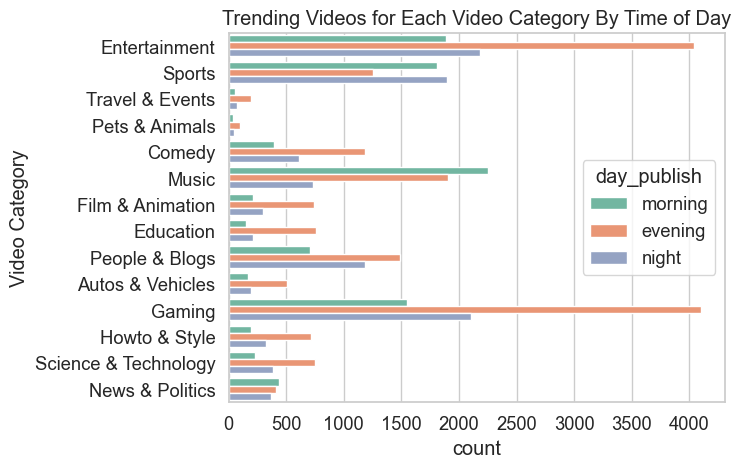

In [267]:
sns.countplot(y = 'categoryName', hue = 'day_publish', data=youtube_sorted)
plt.title("Trending Videos for Each Video Category By Time of Day")
plt.ylabel("Video Category")
plt.show()

For most categories, majority of the videos are posted in the evening except for Sports videos which has most of its videos posted either in the morning or at night.

Next, we can find the 3 most popular videos for each category.

In [268]:
top_5_videos = youtube_sorted.groupby('categoryName')[['title', 'view_count']].apply(lambda x: x.nlargest(3, 'view_count')).reset_index()

top_5_videos

,categoryName,level_1,title,view_count
0,Autos & Vehicles,96438,Guys What's Your Opinion On This Video COMMENT...,67482125
1,Autos & Vehicles,35335,Jeep® | The Middle,35708883
2,Autos & Vehicles,66078,Tire Change #shorts,19633078
3,Comedy,66659,Guess the sound challenge🎵 #shorts by Tsuriki ...,114031494
4,Comedy,63283,Guess the sound challenge🎵 #shorts,107534237
5,Comedy,71079,Using CHOPSTICKS Be Like... #shorts,95023322
6,Education,118025,jai shree ram 🚩#shorts #ashortaday,149615603
7,Education,75048,Join the BTS #PermissiontoDance Challenge only...,50584420
8,Education,102424,Gold Dig It Face Mask #shorts,29442000
9,Entertainment,68687,JETSKI WAX PRANK!! 🤣 - #Shorts,194625542


#### which video category tends to have videos that trend for a long time?

In [269]:
youtube_sorted.groupby('categoryName')['time_diff'].describe()

,count,mean,std,min,25%,50%,75%,max
categoryName,,,,,,,,
Autos & Vehicles,910,5 days 15:38:22.417582417,2 days 01:33:45.021476749,1 days 00:00:00,5 days 00:00:00,5 days 00:00:00,6 days 00:00:00,32 days 00:00:00
Comedy,2228,5 days 22:43:44.057450628,2 days 02:29:38.511895252,0 days 00:00:00,5 days 00:00:00,6 days 00:00:00,7 days 00:00:00,32 days 00:00:00
Education,1138,6 days 03:22:27.627416520,2 days 16:28:54.169492733,1 days 00:00:00,5 days 00:00:00,6 days 00:00:00,7 days 00:00:00,33 days 00:00:00
Entertainment,8336,5 days 20:48:46.295585412,2 days 08:33:36.927838675,0 days 00:00:00,5 days 00:00:00,6 days 00:00:00,6 days 00:00:00,34 days 00:00:00
Film & Animation,1294,5 days 22:20:57.496136012,2 days 03:23:32.367894701,1 days 00:00:00,5 days 00:00:00,6 days 00:00:00,6 days 00:00:00,33 days 00:00:00
Gaming,7996,5 days 10:57:41.330665332,1 days 17:11:44.913362672,0 days 00:00:00,5 days 00:00:00,5 days 00:00:00,6 days 00:00:00,34 days 00:00:00
Howto & Style,1262,6 days 02:30:37.083993660,2 days 23:49:10.482118488,1 days 00:00:00,5 days 00:00:00,6 days 00:00:00,6 days 00:00:00,34 days 00:00:00
Music,5008,5 days 14:17:26.645367412,1 days 18:20:29.722299792,0 days 00:00:00,5 days 00:00:00,6 days 00:00:00,6 days 00:00:00,32 days 00:00:00
News & Politics,1298,5 days 12:55:28.197226502,1 days 13:54:45.502259009,0 days 00:00:00,5 days 00:00:00,6 days 00:00:00,6 days 00:00:00,16 days 00:00:00


In [270]:
viz_df = youtube_sorted.groupby('categoryName')['time_diff'].mean().reset_index()

viz_df['Days'] = viz_df['time_diff'].dt.days

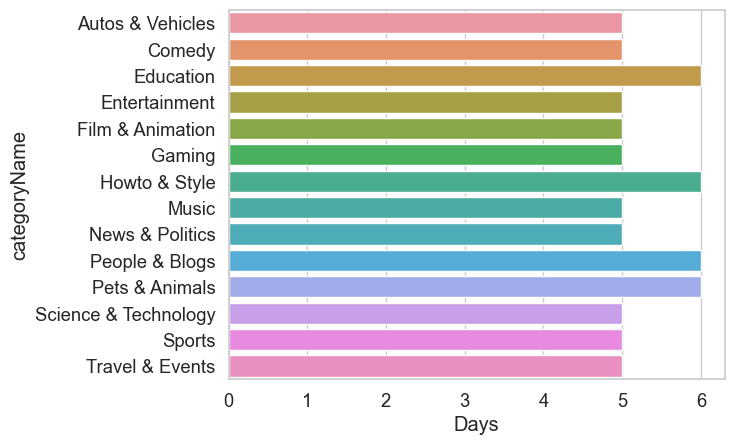

In [271]:
sns.barplot(y='categoryName', x='Days', data=viz_df)

plt.show()

Videos from 'Education', 'Howto & Style', 'People & Blogs' and 'Pets and Animals' categories trend for 6 days on average whereas videos from all the other caetgories trend for 5 days on average.

#### Which video was trending for the longest time for each category?

In [272]:
max_time_diff = youtube_sorted.groupby('categoryName')['time_diff'].idxmax()

youtube_sorted.loc[max_time_diff, ['categoryName', 'title', 'time_diff']]

,categoryName,title,time_diff
96438,Autos & Vehicles,Guys What's Your Opinion On This Video COMMENT...,32 days
18749,Comedy,how to open packaged scissors with no scissors,32 days
42109,Education,What Is International Women's Day?,33 days
103031,Entertainment,WE BROUGHT A LIVE LOBSTER TO A RESTAURANT #shorts,34 days
65064,Film & Animation,Apple Pencil Mini for iPhone (Concept Idea),33 days
107016,Gaming,Spider-Man Goes Crazy,34 days
102793,Howto & Style,Underground Drinks Cooler from PVC Pipes #shorts,34 days
196625,Music,Doechii - What It Is (Block Boy) feat. Kodak B...,32 days
106647,News & Politics,Do androids believe in God? Watch our intervie...,16 days
64683,People & Blogs,COUPLES WORKOUT CHALLENGE,34 days


#### Exploring the `view_count`, `likes` and `comment_count`:

We will start by getting the summary of these features:

In [273]:
youtube_sorted[['view_count', 'likes', 'comment_count']].describe()

,view_count,likes,comment_count
count,4.013000e+04,4.013000e+04,4.013000e+04
mean,2.597951e+06,1.270068e+05,8.847573e+03
std,6.768490e+06,3.653097e+05,7.147396e+04
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.945352e+05,1.802550e+04,1.142000e+03
50%,1.024447e+06,4.421050e+04,2.577000e+03
75%,2.302511e+06,1.109640e+05,6.046000e+03
max,2.644074e+08,1.602155e+07,6.738536e+06


the minimum value for likes, comment_count and view_count are all 0. It makes sense for videos that have comments and likes disabled to have 0 likes and comments. However, trending videos should not have 0 views.

In [274]:
youtube_sorted[youtube_sorted['view_count'] == 0]

,title,publishedAt,channelTitle,categoryName,trending_date,tags,view_count,likes,comment_count,comments_disabled,ratings_disabled,description,time_diff,day_publish
144623,Celebrating Steelpan,2022-07-25,GoogleDoodles,Film & Animation,2022-08-01,[None],0,0,0,1,1,Today’s video Doodle takes you on a journey of...,7 days,evening
51084,Earth Day 2021 Doodle,2021-04-21,GoogleDoodles,Film & Animation,2021-04-28,[None],0,0,0,1,1,This year’s annual Earth Day Doodle highlights...,7 days,morning
65673,Gay And Not Proud - Daniel Howell | YouTube Pr...,2021-06-25,Daniel Howell,Entertainment,2021-06-30,Pride|Pride 2021|YouTube Pride|YouTube Pride 2...,0,0,1739,0,1,"On June 25, join Daniel Howell as he celebrate...",5 days,night
154435,Service for the reception of the coffin at Wes...,2022-09-14,The Royal Family,People & Blogs,2022-09-19,[None],0,0,0,1,1,Watch live as Her Majesty’s coffin arrives at ...,5 days,evening
155094,State Funeral for Her Majesty The Queen,2022-09-19,The Royal Family,People & Blogs,2022-09-23,[None],0,0,0,1,1,Live stream of the service in Westminster Abbe...,4 days,morning
48913,The Funeral of The Duke of Edinburgh,2021-04-17,The Royal Family,People & Blogs,2021-04-18,[None],0,0,0,1,1,The Funeral procession and service for His Roy...,1 days,evening
80668,Tim Bergling's 32nd Birthday,2021-09-07,GoogleDoodles,Film & Animation,2021-09-13,[None],0,0,0,1,1,Today's video Doodle celebrates the 32nd birth...,6 days,morning


Since its only a few and our goal is to find the most 'engaging' videos, we can remove these videos with 0 views

In [275]:
youtube_sorted = youtube_sorted[youtube_sorted['view_count'] != 0]

In [276]:
youtube_sorted[['view_count', 'likes', 'comment_count']].describe()

,view_count,likes,comment_count
count,4.012300e+04,4.012300e+04,4.012300e+04
mean,2.598405e+06,1.270289e+05,8.849073e+03
std,6.768994e+06,3.653377e+05,7.148011e+04
min,2.590500e+04,0.000000e+00,0.000000e+00
25%,4.946710e+05,1.804100e+04,1.142000e+03
50%,1.024557e+06,4.421600e+04,2.577000e+03
75%,2.302694e+06,1.109820e+05,6.046000e+03
max,2.644074e+08,1.602155e+07,6.738536e+06


The data ablove suggests that they are all positively skewed since their mean are greater than the median.

Visualizing view_count:

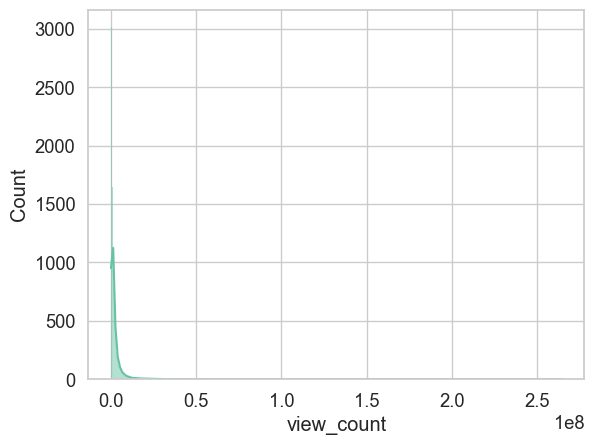

In [277]:
sns.histplot(youtube_sorted, x='view_count', kde=True)
plt.show()

After power transformations:

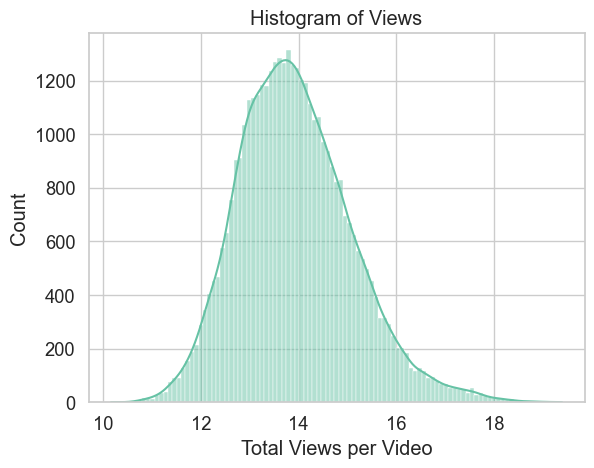

In [278]:
youtube_sorted['view_count'] = np.log(youtube_sorted['view_count'] + 1)

sns.histplot(youtube_sorted, x='view_count', kde=True)
plt.title("Histogram of Views")
plt.xlabel("Total Views per Video")
plt.show()

Similarly we will apply power transformations to both the like count and comment_count:

In [279]:
youtube_sorted['comment_count'] = np.log(youtube_sorted['comment_count'] + 1)
youtube_sorted['likes'] = np.log(youtube_sorted['likes'] + 1)

Visualizing comment_count:

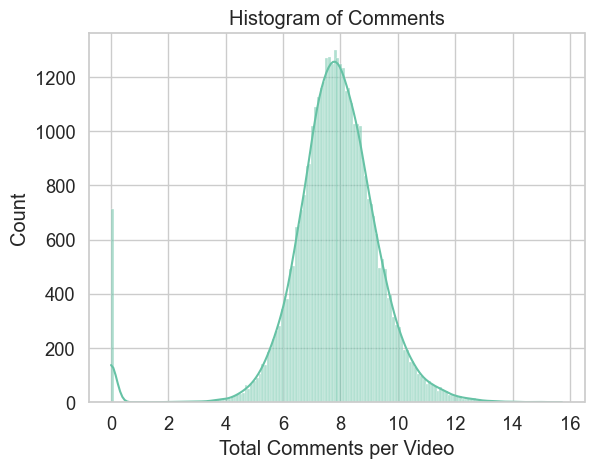

In [280]:
sns.histplot(youtube_sorted, x='comment_count', kde=True)
plt.title("Histogram of Comments")
plt.xlabel("Total Comments per Video")
plt.show()

Visualzing likes count:

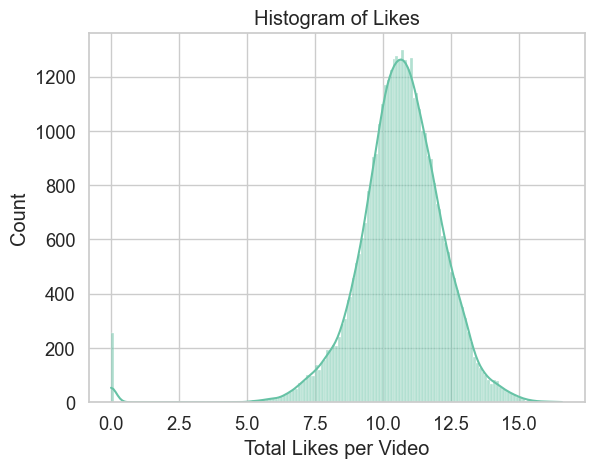

In [281]:
sns.histplot(youtube_sorted, x='likes', kde=True)
plt.title("Histogram of Likes")
plt.xlabel("Total Likes per Video")
plt.show()

For both likes and comments, we can see a small peak at 0. These are all the videos that have their likes and comments disabled.

#### Exploring the likes, vews and comments of videos that donot have their likes and comments disabled:

In this section, we will only look that videos that have likes and comments active and compare these count for each category, find the most popular channels and also the most popular videos.

In [282]:
active_youtube = youtube_sorted.copy()

active_youtube = active_youtube[(active_youtube['comments_disabled'] == 0) & (active_youtube['ratings_disabled'] == 0) & (active_youtube['comment_count'] != 0)]

In [283]:
active_youtube[['likes','comment_count','view_count']].describe()

,likes,comment_count,view_count
count,39238.000000,39238.000000,39238.000000
mean,10.716821,7.930992,13.938388
std,1.433659,1.316183,1.155499
min,2.772589,1.098612,10.162230
25%,9.840574,7.091742,13.118338
50%,10.717092,7.883635,13.843570
75%,11.631852,8.723882,14.648990
max,16.589445,15.723353,19.393002


We can use the box-plot to check the distribution of the data for each group/category.

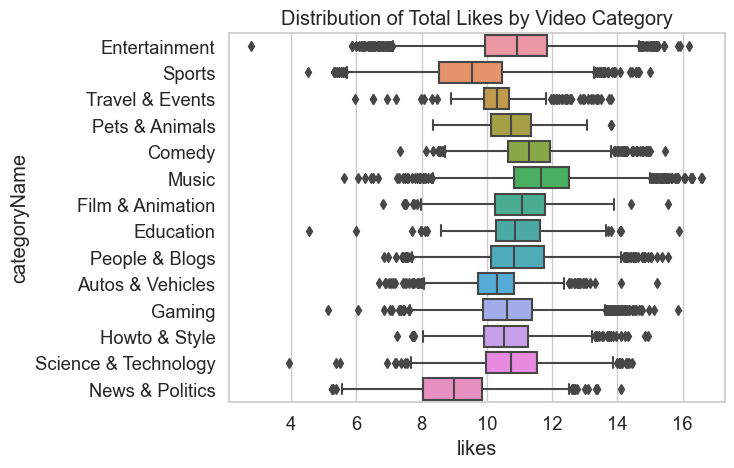

In [284]:
#fig = plt.figure(figsize=(12,15))

sns.boxplot(data=active_youtube, y='categoryName', x='likes')

plt.title('Distribution of Total Likes by Video Category')

plt.show()


- We can see that Music videos tend to receive more likes while "News & Politics" videos receive least number of Likes.
- There seem to be significant differences in the distribution of the data between the different categories. We will perform statistical tests later to confirm this.
- All the categories have a lot of outliers with "Pets & Animals" having the least.

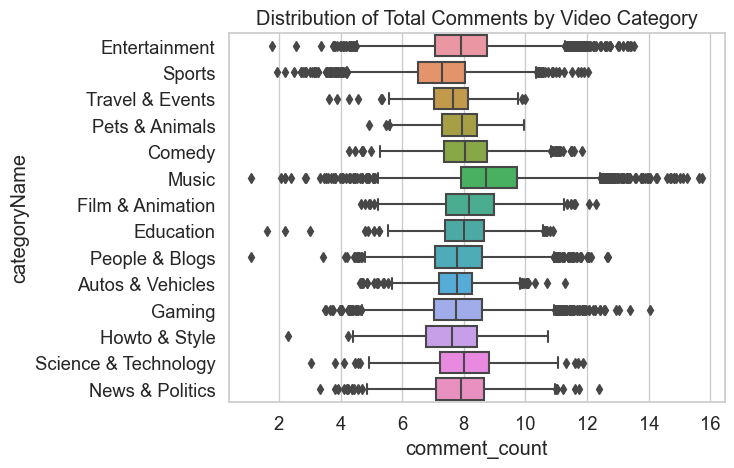

In [285]:
sns.boxplot(data=active_youtube, y='categoryName', x='comment_count')

plt.title('Distribution of Total Comments by Video Category')

plt.show()

- We can see that Music videos tend to receive more comments.
- There does not seem to be significant differences in the distribution of the data between the different categories except maybe Music. We will perform statistical tests later to confirm this.
- All the categories have a lot of outliers.

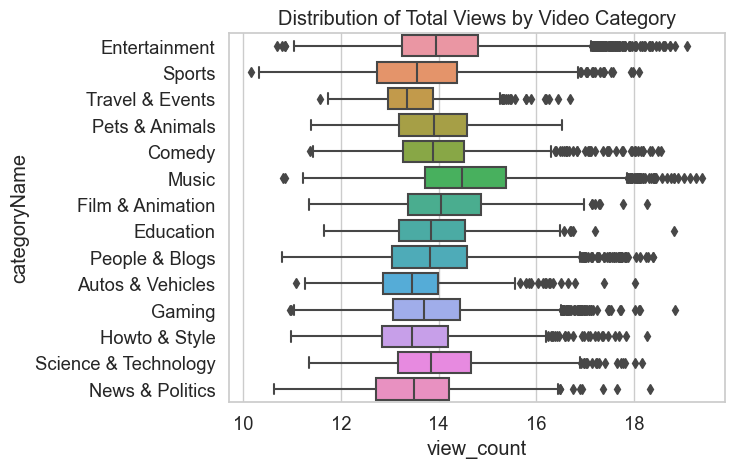

In [286]:
sns.boxplot(data=active_youtube, y='categoryName', x='view_count')

plt.title('Distribution of Total Views by Video Category')

plt.show()

Music videos get more view in general followed by entertainment videos. We will need to check if there are significant differences between the different categories of videos and view counts.

##### We can now check which YouTube Channel received the most likes, views and comments:

Channel & Videos with the most Likes, comments and views:

In [287]:
likes_channel = active_youtube.groupby("channelTitle")["likes"].sum().nlargest(5).reset_index()
views_channel = active_youtube.groupby("channelTitle")["view_count"].sum().nlargest(5).reset_index()
comments_channel = active_youtube.groupby("channelTitle")["comment_count"].sum().nlargest(5).reset_index()

likes_video = active_youtube.sort_values(by='likes', ascending=False)[['title', 'likes']].head(5)
views_video = active_youtube.sort_values(by='view_count', ascending=False)[['title', 'view_count']].head(5)
comments_video = active_youtube.sort_values(by='comment_count', ascending=False)[['title', 'comment_count']].head(5)

#### Top 5 Channels with most likes:

In [288]:
likes_channel

,channelTitle,likes
0,NBA,2645.251745
1,SSundee,1181.900826
2,FORMULA 1,1164.791163
3,DAZN Canada,1113.119317
4,SMTOWN,1023.989915


#### Top 5 Channels with most views:

In [289]:
views_channel

,channelTitle,view_count
0,NBA,3905.562623
1,DAZN Canada,1844.923261
2,FORMULA 1,1555.110823
3,SSundee,1460.158937
4,NHL,1377.938998


#### Top 5 Channels with most Comments:

In [290]:
comments_channel

,channelTitle,comment_count
0,NBA,2165.376082
1,SSundee,860.964078
2,FORMULA 1,859.981388
3,DAZN Canada,857.254698
4,SMTOWN,840.392932


#### Videos with the most likes

In [291]:
likes_video

,title,likes
56275,BTS (방탄소년단) 'Butter' Official MV,16.589445
3379,BTS (방탄소년단) 'Dynamite' Official MV,16.571435
68642,BTS (방탄소년단) 'Permission to Dance' Official MV,16.299487
149823,BLACKPINK - ‘Pink Venom’ M/V,16.295862
4978,BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V,16.283245


#### Top 5 Videos with most Views:

In [292]:
views_video

,title,view_count
56275,BTS (방탄소년단) 'Butter' Official MV,19.393002
3379,BTS (방탄소년단) 'Dynamite' Official MV,19.265042
149823,BLACKPINK - ‘Pink Venom’ M/V,19.145059
68687,JETSKI WAX PRANK!! 🤣 - #Shorts,19.086588
4978,BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V,19.034667


#### Top 5 Videos with most Comments:

In [293]:
comments_video

,title,comment_count
56275,BTS (방탄소년단) 'Butter' Official MV,15.723353
3379,BTS (방탄소년단) 'Dynamite' Official MV,15.618030
21358,BTS (방탄소년단) 'Life Goes On' Official MV,15.241263
6182,GAME (Full Video) Shooter Kahlon | Sidhu Moo...,15.098609
149823,BLACKPINK - ‘Pink Venom’ M/V,15.006816


### Visualizing the correlation between likes, views and comments:

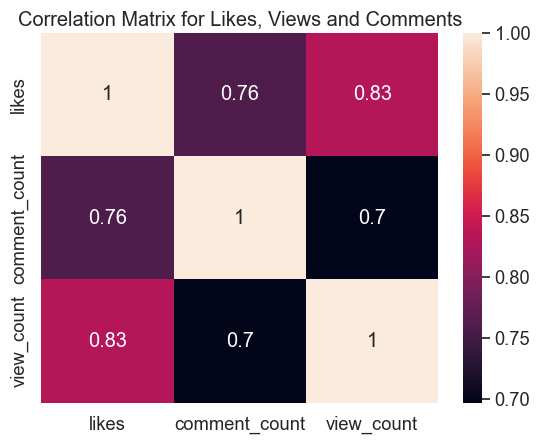

In [294]:
corr_df = active_youtube[['likes','comment_count','view_count']]

corr_matrix = corr_df.corr()

sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix for Likes, Views and Comments')
plt.show()


As expected, likes, views and comments have strong positive correlation with each other.

## Standardizing the likes,views and comments to compare the cahnnels with varying number of subscribers.

Channels with more subscribers will generally have more views and subsequently more likes and comments. So in order to remove this effect, we can transform the values of each variable using z-score normalization so that they ahve a mean of 0 and standard deviation of 1. This will help us evaluate the relative performance of channels with varying number of subscribers.

In [332]:
scaler = MinMaxScaler()
active_youtube[['likes_normalized', 'comments_normalized', 'views_normalized' ]] = scaler.fit_transform(active_youtube[['likes', 'comment_count', 'view_count']])

Now we can define our KPI to evaluate the channels

## Defining KPI:

Videos with more subscribers will generally have more views and since views are positively correalted with likes and comments, these videos will generally receive more likes and comments than videos with small following/subscriber count. So we will try to evaluate the engament for each video rather than how many likes, comments or views it got.

We will measure the level of interaction with the video relative to the number of views it received.

- Engagement rate: $ ER = {Total Likes + Total Comments \over Total Views} $

In [341]:
active_youtube['engagement'] = (active_youtube['likes_normalized'] + active_youtube['comments_normalized'])/(active_youtube['views_normalized'] + 1)

#active_youtube['engagement'] = active_youtube[['engagement']].apply(zscore) + 1

In [342]:
top_channels = active_youtube.groupby("channelTitle")["engagement"].sum().nlargest(5).reset_index()
top_videos = active_youtube.sort_values(by='engagement', ascending=False)[['title', 'engagement', 'channelTitle']].head(5)

Top 5 Channel with most engagement

In [343]:
top_channels

,channelTitle,engagement
0,NBA,183.074901
1,DAZN Canada,81.320873
2,SSundee,76.179966
3,FORMULA 1,74.614827
4,Genshin Impact,67.732672


Top 5 Videos with most engagement

In [344]:
top_videos

,title,engagement,channelTitle
18898,IT'S MY BIRTHDAY SO YOU HAVE TO CLICK ON THIS ...,1.022874,CoryxKenshin
6182,GAME (Full Video) Shooter Kahlon | Sidhu Moo...,1.019181,5911 Records
139587,j-hope 'MORE' Official MV,1.013922,HYBE LABELS
62077,EXO 엑소 'Don't fight the feeling' MV,1.006565,SMTOWN
148230,Congratulations.,1.004244,Markiplier


We will now check which VideoCategory has the best engagement rate

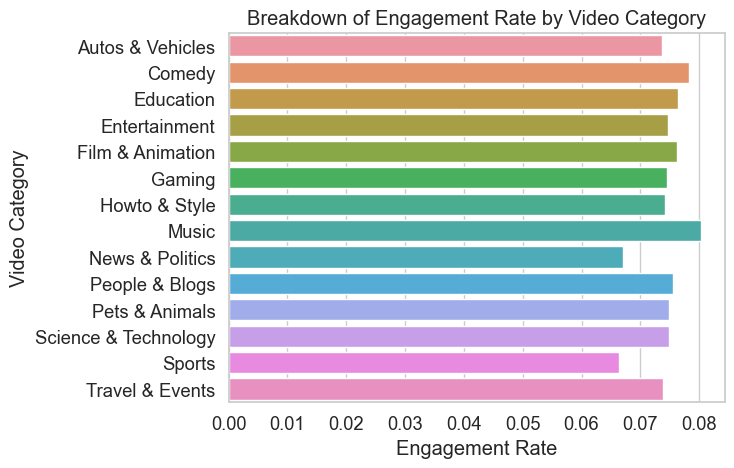

In [348]:
viz_category = active_youtube.groupby('categoryName')['engagement_norm'].mean().reset_index()

sns.barplot(data=viz_category, y='categoryName', x = 'engagement_norm')
plt.xlabel('Engagement Rate')
plt.ylabel("Video Category")
plt.title("Breakdown of Engagement Rate by Video Category")
plt.show()

Music Videos have the most engagement followed by comedy and then education.